In [ ]:
#PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

In [ ]:
pca_df

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


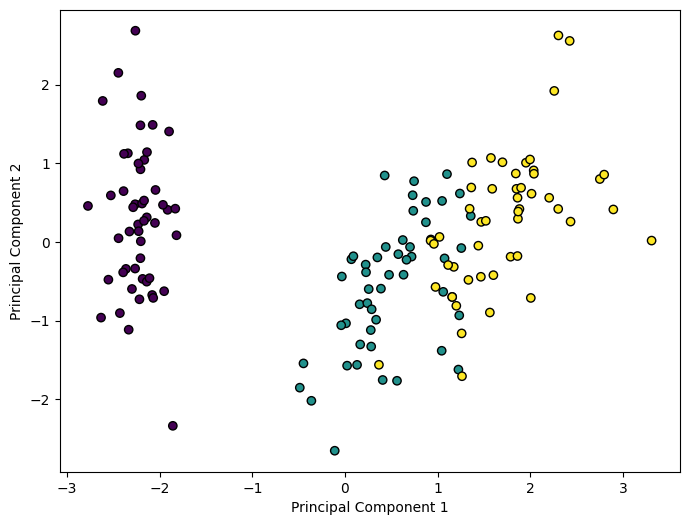

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['target'], cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

In [ ]:
#apply t-sne
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_tsne,y,test_size=0.2,random_state=42)

In [ ]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [ ]:
def predict_iris(sl,sw,pl,pw):
    input_data = scaler.transform([[sl,sw,pl,pw]])
    input_tsne = tsne.embedding_
    prediction = lg.predict(input_tsne)
    return iris.target_names[prediction[0]]

In [ ]:
predict_iris(5.1,3.2,4.3,5.1)

'setosa'

In [ ]:
#SVD implementation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
svd = TruncatedSVD(n_components=2,random_state=42)
X_svd = svd.fit_transform(X_scaled)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_svd,y,test_size=0.2,random_state=42)

In [ ]:
lgs = LogisticRegression()
lgs.fit(X_train,y_train)
y_pred = lgs.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9


In [ ]:
def predict_svd(sl,sw,pl,pw):
  input_data = scaler.transform([[sl,sw,pl,pw]])
  input_svd = svd.transform(input_data)
  prediction = lgs.predict(input_svd)
  return iris.target_names[prediction[0]]

In [ ]:
predict_svd(5.1,3.2,4.3,5.4)

'virginica'